Mehmet Fatih Tekin

Problems 1 (Taylor’s expansion of sin function)
In this problem we consider the univariate function f(x) = sin(x).

1. Plot the graph of f(x) for x ∈ [0, 10].

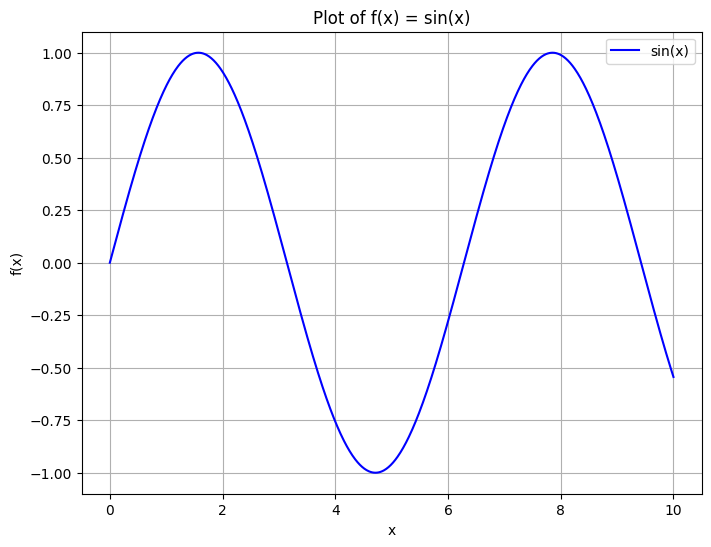

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from math import factorial, sin, cos

def f(x):
    return np.sin(x)

x_vals = np.linspace(0, 10, 1000)
y_vals = f(x_vals)

plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label="sin(x)", color='b')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Plot of f(x) = sin(x)")
plt.legend()
plt.grid()
plt.show()

2. What is the k-th order derivative of f for any k ≥ 0? Find its analytical form then
write a function that calculates the k-th order derivative of f at any point x ∈ R
and for any k ≥ 0. Note that the zero-th order derivative corresponds to f.

In [7]:
def kth_derivative(x, k):
    if k % 4 == 0:
        return np.sin(x)
    elif k % 4 == 1:
        return np.cos(x)
    elif k % 4 == 2:
        return -np.sin(x)
    else:
        return -np.cos(x)

# Example usage:
x_value = np.pi / 4  # Example point
k_value = 5  # Example order
result = kth_derivative(x_value, k_value)
print(f"The {k_value}-th order derivative of sin(x) at x = {x_value} is {result}")

The 5-th order derivative of sin(x) at x = 0.7853981633974483 is 0.7071067811865476


3. Consider the point  ¯x = 0.

(a) Find the form of the tangent line t1(x; ¯x) of f at ¯x and plot it on top of the
graph of f for x ∈ [0, 10]. Recall that the tangent line is the first-order Taylor
approximation.

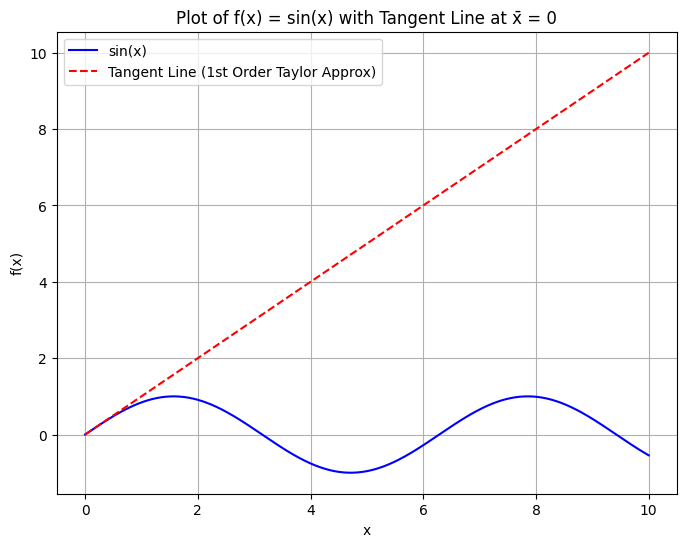

In [8]:
x_tangent = np.linspace(0, 10, 1000)
t1_vals = x_tangent  # Since t1(x) = x

plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label="sin(x)", color='b')
plt.plot(x_tangent, t1_vals, label="Tangent Line (1st Order Taylor Approx)", linestyle='dashed', color='r')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Plot of f(x) = sin(x) with Tangent Line at x̄ = 0")
plt.legend()
plt.grid()
plt.show()

(b) We now want to compute the k-th order Taylor approximation of f for k =
3, 5, 7, . . . , 19:
tk(x; ¯x) = f(¯x) +
1
1!
f′(¯x)(x − ¯x) +
1
2!
f(2)(¯x)(x − ¯x)2 + · · · +
1
k!
f(k)(¯x)(x − ¯x)k.
Compute and plot each curve tk(x; ¯x), k = 1, 3, 5, . . . , 19 and the graph of f for
x ∈ [0, 10] (all curves need to be on the same figure).

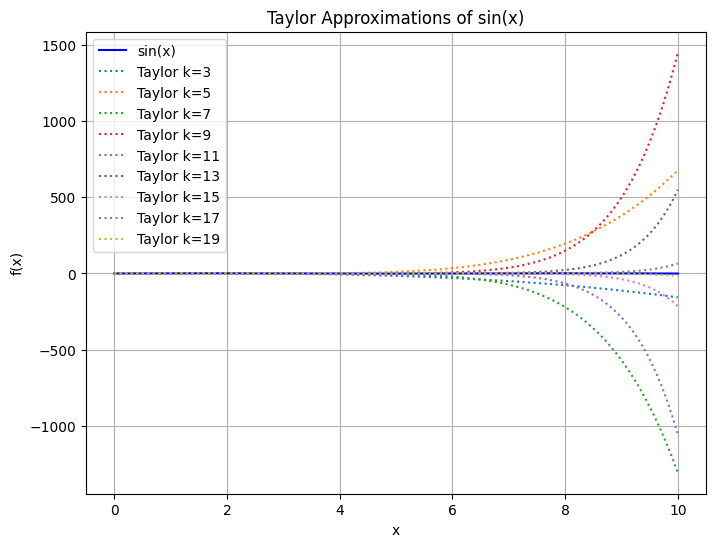

In [14]:
def taylor_approx(x, x0, k):
    return sum((kth_derivative(x0, i) / factorial(i)) * (x - x0) ** i for i in range(k + 1))

plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label="sin(x)", color='b')
for k in range(3, 20, 2):
    taylor_vals = taylor_approx(x_vals, 0, k)
    plt.plot(x_vals, taylor_vals, label=f"Taylor k={k}", linestyle='dotted')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Taylor Approximations of sin(x)")
plt.legend()
plt.grid()
plt.show()


(c) Compute the approximation error of f at x = 2, using the k-th Taylor approximation
of f at ¯x = 0, for k = 1, 3, 5, . . . , 19, i.e., calculate
|f(x) − tk(x; ¯x)|,
for each k. Put the results in a table and comment.

In [16]:
errors = []
x_eval = 2
true_val = f(x_eval)

for k in range(1, 20, 2):
    approx_val = taylor_approx(x_eval, 0, k)
    error = abs(true_val - approx_val)
    errors.append((k, error))

# Display errors in a table
import pandas as pd
error_df = pd.DataFrame(errors, columns=["Taylor Order k", "Approximation Error"])
print(error_df.to_string(index=False))

 Taylor Order k  Approximation Error
              1         1.090703e+00
              3         2.426308e-01
              5         2.403591e-02
              7         1.360919e-03
              9         5.001586e-05
             11         1.290863e-06
             13         2.469399e-08
             15         3.642341e-10
             17         4.269252e-12
             19         4.074519e-14


Problems 2 (Gradient Descent)
In this problem we consider the bivariate function f(x) = 100(x2 − x21
)2 + (x1 − 1)2.

1. Define a function that computes f(x) for any x ∈ R2.

In [17]:
def f_grad_desc(x1, x2):
    return 100 * (x2 - x1**2)**2 + (x1 - 1)**2

2. Plot the graph of f in 2D using contour plots on [−2, 2] × [−2, 2], then “zoom in”
on the minimum and determine its minimum value and optimal variables visually.
Hint: use the contour function in matplotlib.pyplot.

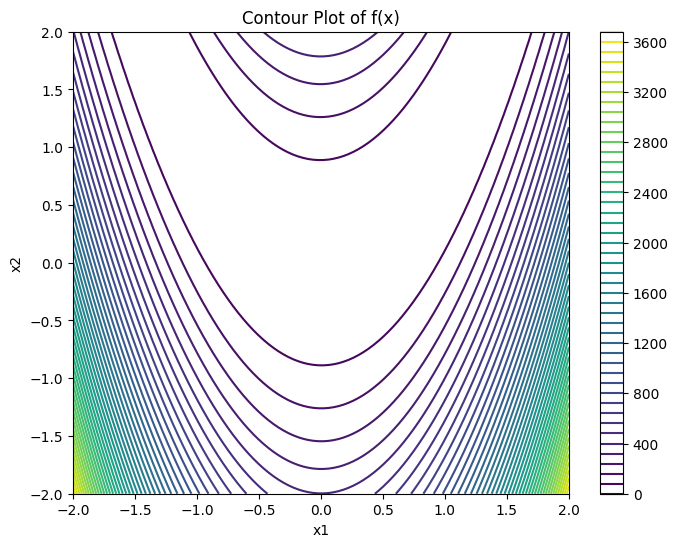

In [18]:
def plot_contour():
    x1_vals = np.linspace(-2, 2, 100)
    x2_vals = np.linspace(-2, 2, 100)
    X1, X2 = np.meshgrid(x1_vals, x2_vals)
    Z = f_grad_desc(X1, X2)
    
    plt.figure(figsize=(8,6))
    plt.contour(X1, X2, Z, levels=50)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title("Contour Plot of f(x)")
    plt.colorbar()
    plt.show()

plot_contour()

3. Plot the graph of f in 3D using contour surface plots. Hint: use the plot surface
function in matplotlib.pyplot.

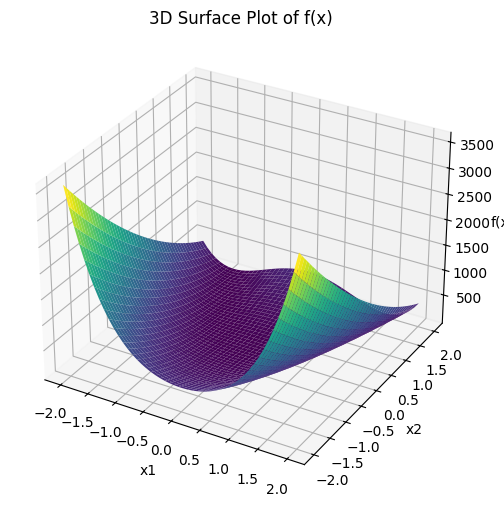

In [20]:
def plot_3d_surface():
    x1_vals = np.linspace(-2, 2, 50)
    x2_vals = np.linspace(-2, 2, 50)
    X1, X2 = np.meshgrid(x1_vals, x2_vals)
    Z = f_grad_desc(X1, X2)
    
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X1, X2, Z, cmap='viridis', edgecolor='none')
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_zlabel("f(x)")
    ax.set_title("3D Surface Plot of f(x)")
    plt.show()

plot_3d_surface()

4. Find the analytical form of the gradient of f, ∇f(x), and define a function grad f
that computes ∇f(x) for any x ∈ R2.

In [21]:
def grad_f(x1, x2):
    df_dx1 = 2 * (x1 - 1) - 400 * x1 * (x2 - x1**2)
    df_dx2 = 200 * (x2 - x1**2)
    return np.array([df_dx1, df_dx2])

5. Write a function that implements the gradient descent algorithm. This function
should take as input
• a function f and its gradient ∇f
• a step size parameter α
• a starting point xstart.
3
• a maximum number of iterations maxiter (default value: 1000).
• a tolerance level ϵ for the norm of the gradient (default value: 10−6).
Moreover this function should return a list containing all iterates of the gradient
descent algorithm.

In [22]:
def gradient_descent(f, grad_f, x_start, alpha=0.001, max_iter=1000, tol=1e-6):
    x = np.array(x_start, dtype=float)
    trajectory = [x.copy()]
    
    for _ in range(max_iter):
        grad = grad_f(x[0], x[1])
        if np.linalg.norm(grad) < tol:
            break
        x -= alpha * grad
        trajectory.append(x.copy())
    
    return np.array(trajectory)

6. Run the gradient descent algorithm for the function f, starting from x(0) = (0.5, 2)T
and using a step size α = 0.001. Print the last iterate, plot the trajectory of iterates
and comment the results.

Last iterate: [1.14982275 1.32264038]


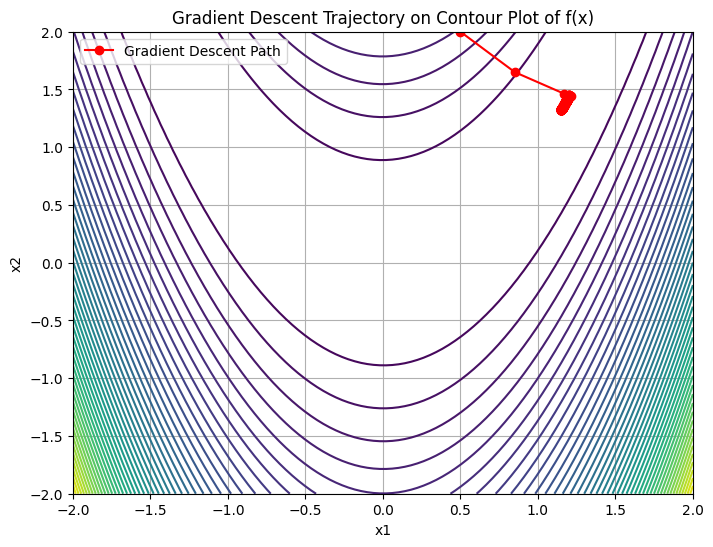

In [23]:
# Initial starting point and step size
x_start = [0.5, 2]
alpha = 0.001

# Run the gradient descent algorithm
trajectory = gradient_descent(f_grad_desc, grad_f, x_start, alpha)

# Print the last iterate
last_iterate = trajectory[-1]
print(f"Last iterate: {last_iterate}")

# Plot the trajectory of iterates
x1_vals = np.linspace(-2, 2, 100)
x2_vals = np.linspace(-2, 2, 100)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Z = f_grad_desc(X1, X2)

plt.figure(figsize=(8, 6))
plt.contour(X1, X2, Z, levels=50)
plt.plot(trajectory[:, 0], trajectory[:, 1], marker='o', color='r', label='Gradient Descent Path')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Gradient Descent Trajectory on Contour Plot of f(x)")
plt.legend()
plt.grid()
plt.show()